In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import make_pipeline

In [34]:
data = pd.read_csv("E:\Great learnings\Projects\globalterrorismdb_0718dist.csv", encoding='latin-1')

In [35]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [36]:
print('Number of Variables in dataset: ', data.shape[1])

Number of Variables in dataset:  135


In [37]:
print('Number of records in dataset: ', data.shape[0])

Number of records in dataset:  181691


In [38]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

## Check for Duplicates

In [40]:
data.duplicated().sum()

0

In [41]:
# No duplicate values

## Null values check

In [43]:
null_values = data.isnull().sum().sort_values(ascending=False)
null_df = pd.DataFrame(null_values, index=None, columns=['Null Count'])

# Null values greater than zero
greater_than_zero = null_df[null_df['Null Count'] > 0]
null_var = len(greater_than_zero)
print(null_var, 'Variables with Null Values')

106 Variables with Null Values


In [44]:
null_df.reset_index(inplace=True)
null_df = null_df.rename(columns={'index': 'Variables'})
null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Variables   135 non-null    object
 1   Null Count  135 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [45]:
null_df[null_df['Null Count']>0]

,Variables,Null Count
0,gsubname3,181671
1,weapsubtype4_txt,181621
2,weapsubtype4,181621
3,weaptype4,181618
4,weaptype4_txt,181618
...,...,...
101,guncertain1,380
102,ishostkid,178
103,specificity,6
104,doubtterr,1


In [46]:
# Calculating percent missing and percent complete
null_df['percent_missing'] = null_df['Null Count']/(len(data))
null_df['percent_complete'] = 1-null_df['percent_missing']

perc_complete = 0.95
selected_attributes = null_df[null_df['percent_complete'] >= perc_complete]
print(len(selected_attributes), f'Attributes have a percent complete >= {int(perc_complete*100)}%')


41 Attributes have a percent complete >= 95%


In [47]:
selected_attributes.reset_index()

,index,Variables,Null Count,percent_missing,percent_complete
0,94,longitude,4557,0.025081,0.974919
1,95,latitude,4556,0.025076,0.974924
2,96,natlty1,1559,0.008581,0.991419
3,97,natlty1_txt,1559,0.008581,0.991419
4,98,target1,638,0.003511,0.996489
5,99,city,435,0.002394,0.997606
6,100,provstate,421,0.002317,0.997683
7,101,guncertain1,380,0.002091,0.997909
8,102,ishostkid,178,0.000980,0.999020
9,103,specificity,6,0.000033,0.999967


In [48]:
selected_attributes_list = selected_attributes['Variables'].to_list()
data_cleaned = data.loc[:, data.columns.isin(selected_attributes_list)]
data_cleaned.shape

(181691, 41)

<Axes: >

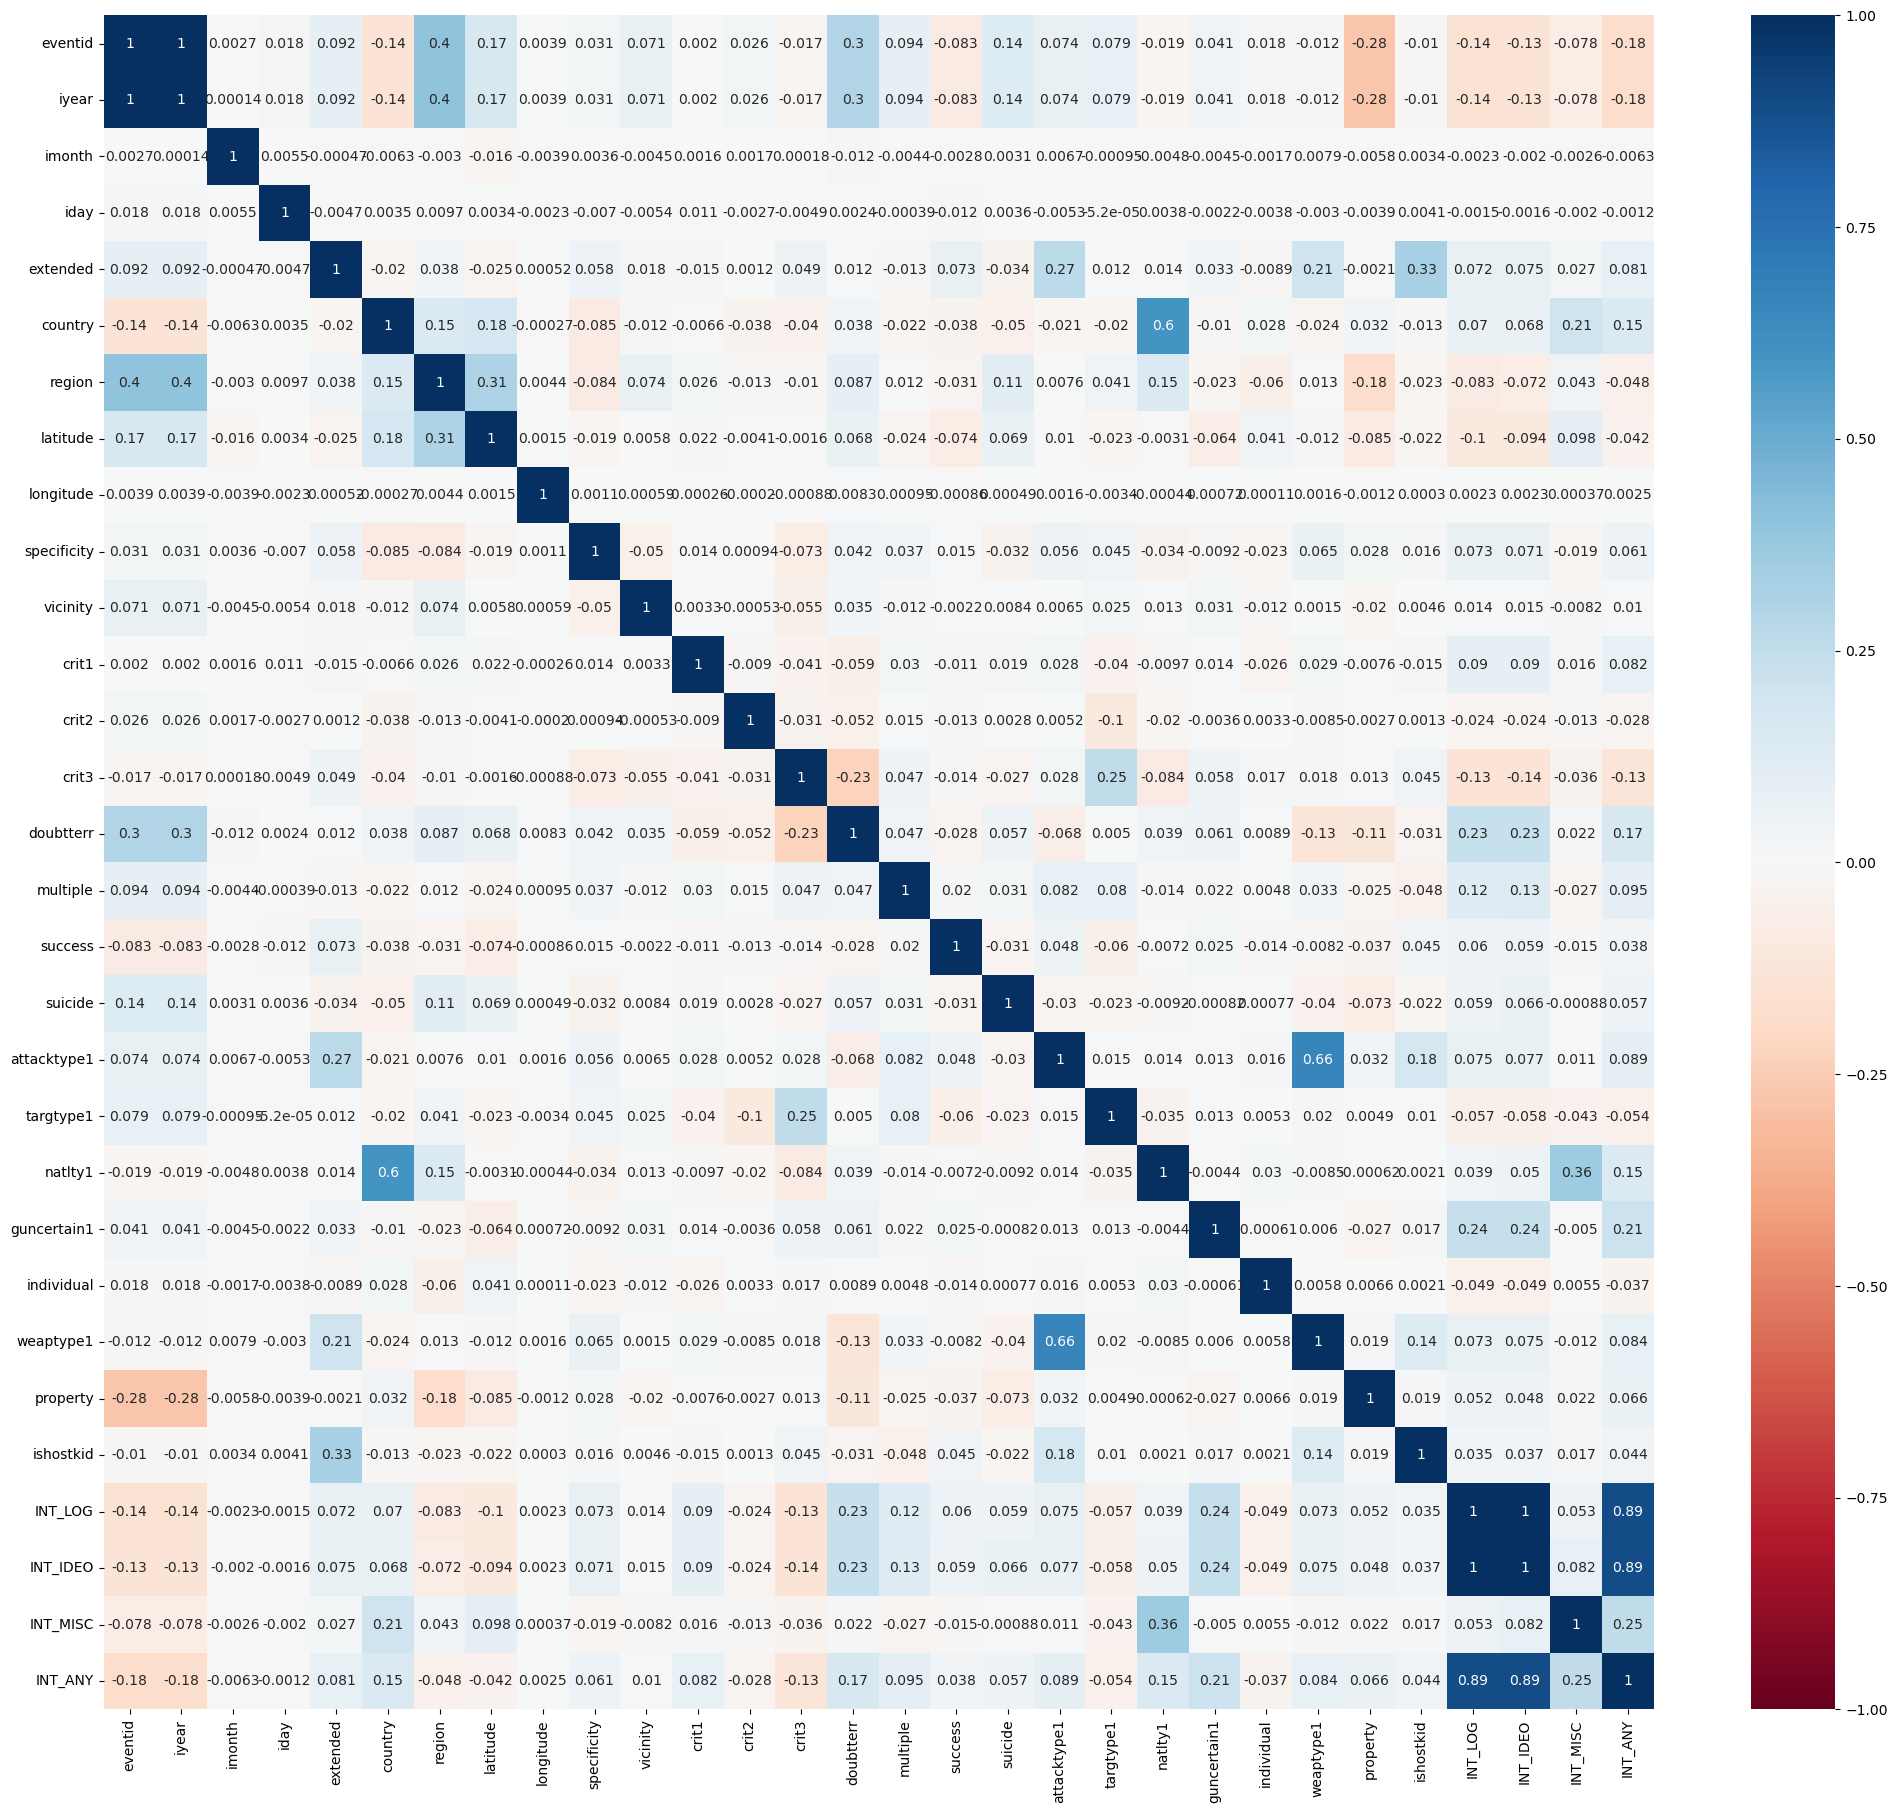

In [49]:
plt.figure(figsize=(25, 22))
sns.heatmap(data_cleaned.corr(numeric_only=True), annot=True, cmap='RdBu', vmin=-1)

In [50]:
corr_matrix = data_cleaned.select_dtypes(np.number).corr()

In [51]:
high_corr = corr_matrix.where((corr_matrix > 0.5) & (corr_matrix < 1.0))

high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

print('Highly correlated feature pairs (0.5 < corr < 1.0)')
print(high_corr_pairs)

Highly correlated feature pairs (0.5 < corr < 1.0)
      Feature_1    Feature_2  Correlation
0       eventid        iyear     0.999996
1         iyear      eventid     0.999996
6       INT_LOG     INT_IDEO     0.996211
8      INT_IDEO      INT_LOG     0.996211
9      INT_IDEO      INT_ANY     0.893811
11      INT_ANY     INT_IDEO     0.893811
7       INT_LOG      INT_ANY     0.891051
10      INT_ANY      INT_LOG     0.891051
3   attacktype1    weaptype1     0.658954
5     weaptype1  attacktype1     0.658954
2       country      natlty1     0.600020
4       natlty1      country     0.600020


In [52]:
corr_df = pd.DataFrame(high_corr_pairs)
corr_df.reset_index(inplace=True)

drop_list = set()

for var1, var2 in zip(corr_df['Feature_1'], corr_df['Feature_1']):
    drop_list.add(var1)
    drop_list.add(var2)

drop_list

{'INT_ANY',
 'INT_IDEO',
 'INT_LOG',
 'attacktype1',
 'country',
 'eventid',
 'iyear',
 'natlty1',
 'weaptype1'}

In [53]:
# Remove correlated columns from the dataset
data_cleaned = data_cleaned.drop(labels=drop_list, axis=1)
data_cleaned.columns

Index(['imonth', 'iday', 'extended', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success',
       'suicide', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'target1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1_txt',
       'property', 'ishostkid', 'dbsource', 'INT_MISC'],
      dtype='object')

In [54]:
len(data_cleaned.columns)

32

In [55]:
data_cleaned = data_cleaned.drop(labels=['dbsource'], axis=1)

In [56]:
gname_breakdown = data_cleaned.groupby('gname')[['gname']].count().rename(columns={'gname': 'count'})
gname_total = gname_breakdown.index
gname_above_avg = gname_breakdown[gname_breakdown['count'] > gname_breakdown['count'].mean() ]

print('Total Groups: ', len(gname_total))
print('Count of groups responsible for more than the Average attacks: ', len(gname_above_avg))

Total Groups:  3537
Count of groups responsible for more than the Average attacks:  204


In [57]:
# Cut data_cleaned to include only selected groups
gname_above_avg_list = gname_above_avg.index.to_list()
data_cleaned = data_cleaned[data_cleaned['gname'].isin(gname_above_avg_list)]
X_test_final = data_cleaned[data_cleaned['gname']=='Unknown']

In [58]:
# View info on target after removal
gname_breakdown = data_cleaned.groupby(['gname'])[['gname']].count().rename(columns={'gname':'count'})
gname_total = gname_breakdown.index

In [59]:
print('Total groups in new dataset: ', len(gname_total))
print('\n', 'Total number of records after processing: ', len(data_cleaned))

Total groups in new dataset:  204

 Total number of records after processing:  166768


In [60]:
gname_breakdown = data_cleaned.groupby('gname')[['gname']].count().rename(columns={'gname': 'count'})
gname_breakdown

,count
gname,
Abu Sayyaf Group (ASG),527
Action Directe,55
African National Congress (South Africa),607
Al-Aqsa Martyrs Brigade,172
Al-Fatah,56
...,...
United Liberation Front of Assam (ULFA),357
United Popular Action Movement,109
United Self Defense Units of Colombia (AUC),67


In [61]:
# Remove records where gname is 'Unknown'
# Cut data_cleaned 
g_list = gname_breakdown.index.to_list()
g_list.remove('Unknown')

In [62]:
data_cleaned = data_cleaned[data_cleaned['gname'].isin(g_list)]
print("Total number of records after removing 'unknown' groups: ", len(data_cleaned))

Total number of records after removing 'unknown' groups:  83986


## Handle Categorical Variables

In [64]:
# view levels of each categorical variable
    # Only those with levels <30 will be included (ensures python doesn't crash in OneHotEncoding)

cat_vars = data_cleaned.loc[:, data_cleaned.dtypes == object]
cat_vars_count = cat_vars.nunique()
cat_vars_count

country_txt          144
region_txt            12
provstate           1436
city               21912
attacktype1_txt        9
targtype1_txt         22
target1            38862
natlty1_txt          169
gname                203
weaptype1_txt         11
dtype: int64

In [65]:
data_cleaned = data_cleaned.drop(labels=['country_txt', 'provstate', 'city', 'target1', 'natlty1_txt'], axis=1)


## Drop records with null values

In [67]:
data_cleaned.isnull().sum()

imonth                0
iday                  0
extended              0
region                0
region_txt            0
latitude           2723
longitude          2723
specificity           3
vicinity              0
crit1                 0
crit2                 0
crit3                 0
doubtterr             0
multiple              0
success               0
suicide               0
attacktype1_txt       0
targtype1             0
targtype1_txt         0
gname                 0
guncertain1         374
individual            0
weaptype1_txt         0
property              0
ishostkid            64
INT_MISC              0
dtype: int64

In [68]:
data_cleaned = data_cleaned.dropna()
data_cleaned.shape

(80833, 26)

In [69]:
data_cleaned.columns.values

array(['imonth', 'iday', 'extended', 'region', 'region_txt', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'gname', 'guncertain1', 'individual',
       'weaptype1_txt', 'property', 'ishostkid', 'INT_MISC'], dtype=object)

In [70]:
X_test_final.isnull().sum()

imonth                0
iday                  0
extended              0
country_txt           0
region                0
region_txt            0
provstate           230
city                338
latitude           1296
longitude          1297
specificity           2
vicinity              0
crit1                 0
crit2                 0
crit3                 0
doubtterr             1
multiple              0
success               0
suicide               0
attacktype1_txt       0
targtype1             0
targtype1_txt         0
target1             233
natlty1_txt         915
gname                 0
guncertain1           2
individual            0
weaptype1_txt         0
property              0
ishostkid            33
INT_MISC              0
dtype: int64

In [71]:
X_test_final = X_test_final.dropna()
X_test_final = X_test_final.drop(labels=['country_txt', 'provstate', 'city', 'target1', 'natlty1_txt'], axis=1)
X_test_final.shape

(79830, 26)

In [72]:
X_test_final.head()

,imonth,iday,extended,region,region_txt,latitude,longitude,specificity,vicinity,crit1,...,attacktype1_txt,targtype1,targtype1_txt,gname,guncertain1,individual,weaptype1_txt,property,ishostkid,INT_MISC
2,1,0,0,5,Southeast Asia,15.478598,120.599741,4.0,0,1,...,Assassination,10,Journalists & Media,Unknown,0.0,0,Unknown,0,0.0,1
3,1,0,0,8,Western Europe,37.997490,23.762728,1.0,0,1,...,Bombing/Explosion,7,Government (Diplomatic),Unknown,0.0,0,Explosives,1,0.0,1
4,1,0,0,4,East Asia,33.580412,130.396361,1.0,0,1,...,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,0.0,0,Incendiary,1,0.0,1
7,1,2,0,1,North America,37.791927,-122.225906,1.0,0,1,...,Bombing/Explosion,21,Utilities,Unknown,0.0,0,Explosives,1,0.0,0
12,1,8,0,8,Western Europe,41.890961,12.490069,1.0,0,1,...,Hijacking,6,Airports & Aircraft,Unknown,0.0,0,Firearms,0,0.0,1


In [73]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
encoder = OneHotEncoder
columns = ['region_txt', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt'] # cols having categories < 30

In [75]:
df_encoded = pd.get_dummies(data_cleaned, columns=columns, drop_first=True, dtype=int)
df_encoded.shape

(80833, 71)

In [76]:
X_test_encoded = pd.get_dummies(X_test_final, columns=columns, drop_first=True, dtype=int)
X_test_encoded.shape

(79830, 73)

In [77]:
missing_cols = [col for col in X_test_encoded.columns if col not in df_encoded.columns]
print("Columns in X_test_encoded but not in df_encoded:\n", missing_cols)

Columns in X_test_encoded but not in df_encoded:
 ['weaptype1_txt_Chemical', 'weaptype1_txt_Radiological']


In [78]:
X_test_encoded = X_test_encoded.drop(columns=missing_cols)

In [79]:
X_test_encoded.shape

(79830, 71)

## Modeling

In [81]:
# Splitting data into independent and dependent variables
x = df_encoded.drop(columns=['gname'])
y = df_encoded['gname']

In [82]:
# Splitting data usingt train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Train and Test Shape
print('Training Data: x=%s, y=%s ' % (x_train.shape, y_train.shape))
print('Test Data: x=%s, y=%s' % (x_test.shape, y_test.shape))

Training Data: x=(64666, 70), y=(64666,) 
Test Data: x=(16167, 70), y=(16167,)


## DecisionTreeClassifier

In [84]:
model_dt = DecisionTreeClassifier(random_state=2)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2)

In [85]:
ypred_h_dt = model_dt.predict(x_test)
ypred_s_dt = model_dt.predict_proba(x_test)[:, 1]

In [86]:
accuracy_dt = accuracy_score(y_test, ypred_h_dt)
print(f'Accuracy Score DT: {accuracy_dt}')

Accuracy Score DT: 0.7895713490443496


In [87]:
# Accuracy = 78.9%

In [88]:
feature_imp = pd.DataFrame({'importances':model_dt.feature_importances_}, index=x_train.columns.to_list()).sort_values(by='importances', ascending=False)
feature_imp[feature_imp['importances'] > 0].head(12)

,importances
longitude,0.337158
latitude,0.266016
iday,0.055018
imonth,0.047400
region_txt_South Asia,0.038200
region_txt_Sub-Saharan Africa,0.026568
targtype1,0.023564
doubtterr,0.018357
guncertain1,0.016076
region_txt_South America,0.015161


In [89]:
print(classification_report(y_test, ypred_h_dt))

                                                              precision    recall  f1-score   support

                                      Abu Sayyaf Group (ASG)       0.79      0.89      0.84        95
                                              Action Directe       0.58      0.47      0.52        15
                    African National Congress (South Africa)       0.97      0.98      0.98       109
                                     Al-Aqsa Martyrs Brigade       0.24      0.25      0.25        36
                                                    Al-Fatah       0.00      0.00      0.00         7
                                Al-Gama'at al-Islamiyya (IG)       0.89      0.95      0.92        44
                                             Al-Nusrah Front       0.60      0.63      0.62        51
                                                    Al-Qaida       0.47      0.47      0.47        19
                                            Al-Qaida in Iraq       0.62      0.66

## KNeighborsClassifier

In [91]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [92]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [93]:
ypred_h_knn = model_knn.predict(x_test_scaled)
ypred_s_knn = model_knn.predict_proba(x_test_scaled)[:, 1]

In [94]:
accuracy_knn = accuracy_score(y_test, ypred_h_knn)
print(f'Accuracy Score KNN: {accuracy_knn}')

Accuracy Score KNN: 0.5551431929238573


In [95]:
# Accuracy = 55.5%

## SDGClassifier

In [97]:
model_sgd = SGDClassifier(max_iter=1000, tol=1e-3)
model_sgd.fit(x_train_scaled, y_train)

SGDClassifier()

In [98]:
ypred_h_sgd = model_sgd.predict(x_test_scaled)

In [99]:
accuracy_sgd = accuracy_score(y_test, ypred_h_sgd)
print('Accuracy SGD: ', accuracy_sgd)

Accuracy SGD:  0.596585637409538


In [100]:
# Accuracy: 59.9%

## RandomForestClassifier

In [102]:
model_rf = RandomForestClassifier(n_estimators=200, random_state=2)
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=2)

In [103]:
ypred_h_rf = model_rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, ypred_h_rf)
print('Accuracy RF: ', accuracy_rf)

Accuracy RF:  0.8185192057895714


In [104]:
# grid_rf = {'n_estimators': [200, 300], 
#            'max_depth': [12, 14], 
#            'min_samples_split': [2, 5],
#            'min_samples_leaf': [1, 2]}

# gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
#                        param_grid=grid_rf, 
#                        scoring='accuracy', 
#                        cv=10, 
#                        n_jobs=-1)
# gscv_rf.fit(x_train, y_train)

In [105]:
# best_estimator = gscv_rf.best_estimator_
# best_score = gscv_rf.best_score_
# best_params = gscv_rf.best_params_

# print('Best Score : ', best_score)
# print('Best Params: \n', best_params)

In [106]:
accuracy_dict = {
    'Decision Tree': accuracy_dt,
    'KNN': accuracy_knn,
    'SGD': accuracy_sgd,
    'Random Forest': accuracy_rf
}

# Create DataFrame
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

accuracy_df.sort_values(by=['Accuracy'], ascending=False).reset_index()

,index,Model,Accuracy
0,3,Random Forest,0.818519
1,0,Decision Tree,0.789571
2,2,SGD,0.596586
3,1,KNN,0.555143


## Predicting Unknown gnames using Test Data

In [108]:
ypred_h_fin = model_rf.predict(X_test_encoded.drop(columns=['gname']))

In [109]:
ypred_h_fin.shape

(79830,)

In [110]:
X_test_encoded['Predicted_gnames'] = ypred_h_fin

## Final predictions on the test data using decisionTreeModel

In [112]:
X_test_encoded['Predicted_gnames'].value_counts()

Predicted_gnames
Islamic State of Iraq and the Levant (ISIL)    18073
Taliban                                         5789
Tehrik-i-Taliban Pakistan (TTP)                 5182
Separatists                                     2106
New People's Army (NPA)                         1886
                                               ...  
People's Liberation Front of India                 3
Haqqani Network                                    3
Resistenza                                         2
Al-Qaida                                           1
United Self Defense Units of Colombia (AUC)        1
Name: count, Length: 203, dtype: int64